In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import os
import sys
from importlib import reload
from scipy.stats import zscore
import scipy.io
from scipy.interpolate import make_interp_spline, BSpline
from scipy.signal import savgol_filter as savgol 
from scipy.cluster.hierarchy import fcluster

from pydmd import DMD

import matplotlib.pyplot as plt
import seaborn as sns

# local imports
sys.path.append("../python/")

import utils as ut
reload(ut)


<module 'utils' from '/home/cstansbu/git_repositories/DMD_gene/notebooks/../python/utils.py'>

test_data.shape=(7, 11, 3)
Xp.shape=(7, 30) Xf.shape=(7, 30)


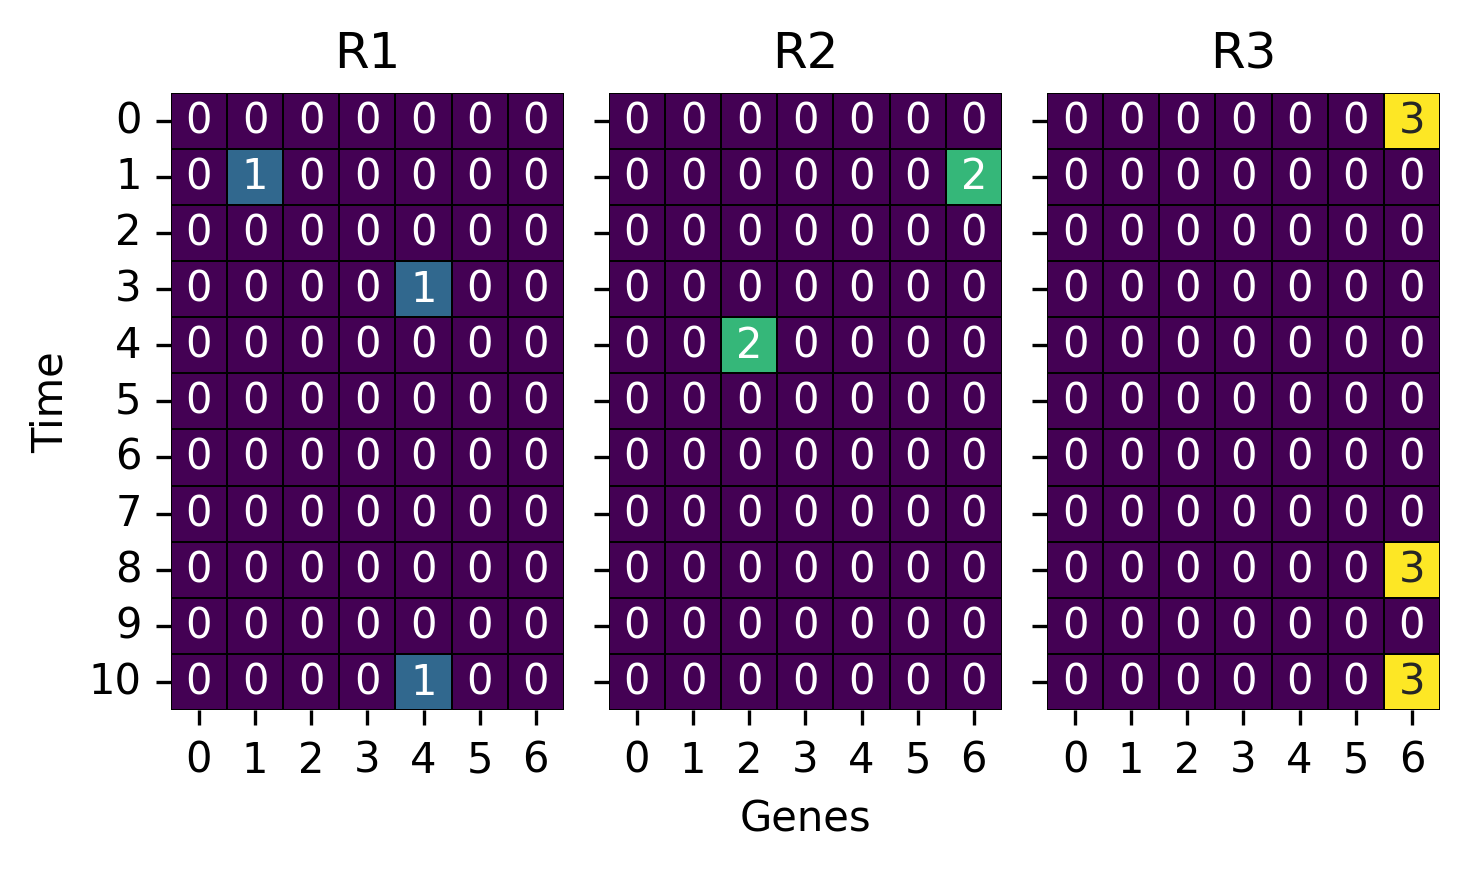

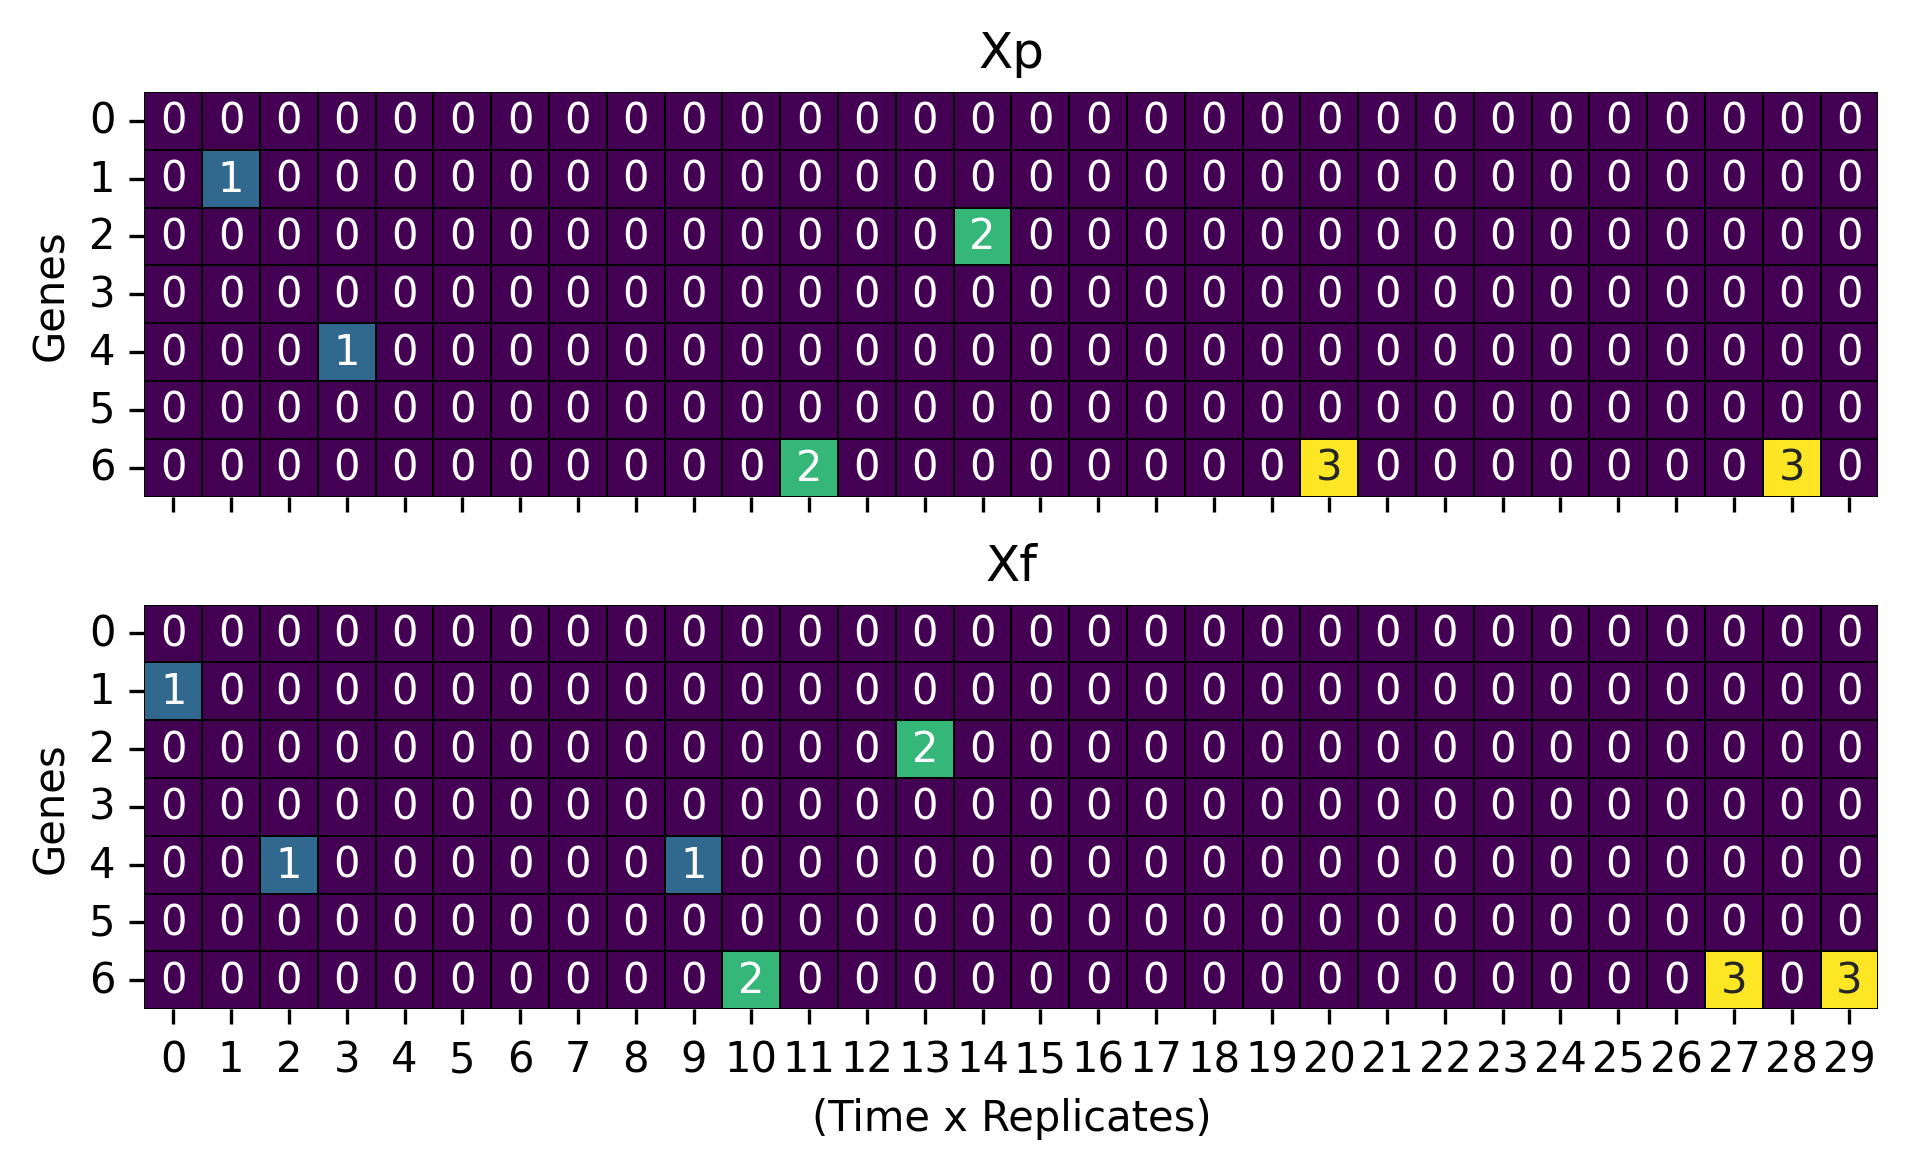

In [3]:

nt = 11
ng = 7
vmin = 0
vmax = 3

r1 = np.zeros((nt, ng))
r2 = np.zeros((nt, ng))
r3 = np.zeros((nt, ng))

r1[1, 1] = 1
r1[3, 4] = 1
r1[10, 4] = 1

r2[4, 2] = 2
r2[1, 6] = 2

r3[0, 6] = 3
r3[8, 6] = 3
r3[10, 6] = 3

# test_data = np.asarray([r1, r2])
test_data = np.asarray([r1, r2, r3])
test_data = np.swapaxes(test_data, 0, 2)
print(f"{test_data.shape=}")


n, m, r = test_data.shape
Xp = test_data[:,:-1].reshape(n, (m-1)*r, order='F') 
Xf = test_data[:,1:].reshape(n, (m-1)*r, order='F') 

print(f"{Xp.shape=} {Xf.shape=}")

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 5, 4

fig, axs = plt.subplots(1, 3, sharey=True)

sns.heatmap(r1, 
            ax=axs[0], 
            cbar=False, 
            cmap='viridis', 
            lw=0.1,
            square=True,
            vmin=vmin,
            vmax=vmax,
            linecolor='k',
            annot=True)

axs[0].set_title("R1")
axs[0].tick_params(axis='y', rotation=0)
axs[0].set_ylabel("Time")

sns.heatmap(r2, 
            ax=axs[1], 
            cbar=False, 
            cmap='viridis', 
            lw=0.1,
            square=True,
            vmin=vmin,
            vmax=vmax,
            linecolor='k',
            annot=True)

axs[1].set_title("R2")
axs[1].tick_params(axis='y', rotation=0)
axs[1].set_xlabel("Genes")

sns.heatmap(r3, 
            ax=axs[2], 
            cbar=False, 
            cmap='viridis', 
            lw=0.1,
            square=True,
            vmin=vmin,
            vmax=vmax,
            linecolor='k',
            annot=True)

axs[2].set_title("R3")
axs[2].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 12, 4

fig, axs = plt.subplots(2, 1, sharex=True)


sns.heatmap(Xp, 
            ax=axs[0], 
            cbar=False, 
            cmap='viridis', 
            lw=0.1,
            square=True,
            vmin=vmin,
            vmax=vmax,
            linecolor='k',
            annot=True)

axs[0].set_title("Xp")
axs[0].tick_params(axis='y', rotation=0)
axs[0].set_ylabel("Genes")

sns.heatmap(Xf, 
            ax=axs[1], 
            cbar=False, 
            cmap='viridis', 
            lw=0.1,
            square=True,
            vmin=vmin,
            vmax=vmax,
            linecolor='k',
            annot=True)

axs[1].set_title("Xf")
axs[1].tick_params(axis='y', rotation=0)
axs[1].set_xlabel("(Time x Replicates)")
axs[1].set_ylabel("Genes")

plt.tight_layout()
plt.show()